## Lesson 15 - Statistics Tools

In this lesson we'll consider some of the various statistics tools available in Python. Many packages provide statistical support: Pandas, Numpy, Scipy, Statsmodels, and Scikit-bio.

In [1]:
import pandas as pd
import numpy as np
import scipy
import skbio
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 20)
sns.set_palette('colorblind')

### Pandas

A large number of methods for computing descriptive statistics and other related operations on Series, DataFrame, and Panel. Most of these are aggregations (hence producing a lower-dimensional result) like `sum()`, `mean()`, and `quantile()`, but some of them, like `cumsum()` and `cumprod()`, produce an object of the same size. Generally speaking, these methods take an axis argument, just like `ndarray.{sum, std, ...}`, but the axis can be specified by name or integer:

* Series: no axis argument needed
* DataFrame: “index” (axis=0, default), “columns” (axis=1)
* Panel: “items” (axis=0), “major” (axis=1, default), “minor” (axis=2)

Function | Description
--------- | ----------
count | Number of non-null observations
sum | Sum of values
mean | Mean of values
mad | Mean absolute deviation
median | Arithmetic median of values
min | Minimum
max | Maximum
mode | Mode
abs | Absolute Value
prod | Product of values
std | Bessel-corrected sample standard deviation
var | Unbiased variance
sem | Standard error of the mean
skew | Sample skewness (3rd moment)
kurt | Sample kurtosis (4th moment)
quantile | Sample quantile (value at %)
cumsum | Cumulative sum
cumprod | Cumulative product
cummax | Cumulative maximum
cummin | Cumulative minimum

In [3]:
# format the data: covert to datetime, average precipitation per month, get month and year, reset index
df = pd.read_csv('la_jolla_precip.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.groupby('DATE').mean()
df['MONTH'] = [x.month for x in df.index]
df['YEAR'] = [x.year for x in df.index]
df.reset_index(inplace=True)

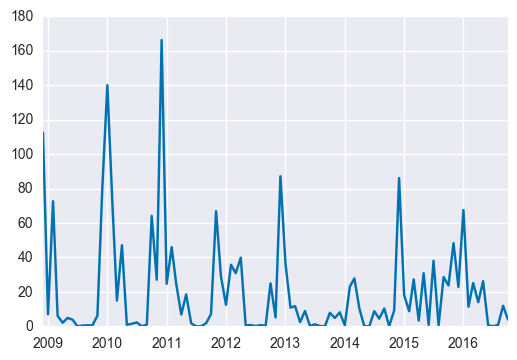

In [4]:
# explore the data using a plot
plt.plot(df.DATE, df.PRCP);

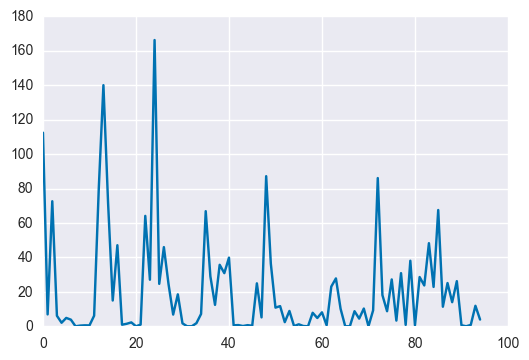

In [5]:
# make sure our index is sequential
plt.plot(df.index, df.PRCP);

#### Basic stats

In [6]:
# describe
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,MONTH,YEAR
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.830764,-117.245553,147.555789,20.878070,6.452632,2012.378947
std,0.007165,0.001824,6.192505,30.779847,3.457242,2.302538
min,32.825400,-117.250100,139.200000,0.000000,1.000000,2008.000000
25%,32.825550,-117.245833,139.200000,0.850000,3.500000,2010.000000
50%,32.825550,-117.244900,152.250000,8.750000,6.000000,2012.000000
75%,32.840533,-117.244900,152.250000,27.116667,9.000000,2014.000000
max,32.840533,-117.239700,154.800000,166.200000,12.000000,2016.000000


In [7]:
# mean
df.PRCP.mean()

20.878070175438598

In [8]:
# std
df.PRCP.std()

30.779846675482016

In [9]:
# quantile
df.PRCP.quantile(0.25), df.PRCP.quantile(0.5), df.PRCP.quantile(0.75)

(0.8500000000000001, 8.75, 27.116666666666667)

In [10]:
# min
df.PRCP.min(), df.PRCP.idxmin()

(0.0, 7)

In [11]:
# max (with rounding)
df.PRCP.max(), df.PRCP.max().round(), df.PRCP.idxmax()

(166.19999999999999, 166.0, 24)

In [12]:
# cumsum
df.PRCP.cumsum()

0      112.400000
1      119.300000
2      191.900000
3      198.000000
4      200.050000
5      204.900000
6      208.750000
7      208.750000
8      209.150000
9      209.700000
         ...     
85    1889.566667
86    1900.916667
87    1926.016667
88    1940.016667
89    1966.216667
90    1966.816667
91    1966.816667
92    1967.616667
93    1979.516667
94    1983.416667
Name: PRCP, dtype: float64

In [13]:
# value_counts
df.PRCP.round().value_counts()

0.0      16
1.0      12
2.0       5
9.0       4
7.0       3
25.0      3
5.0       3
4.0       3
12.0      3
11.0      2
         ..
40.0      1
87.0      1
28.0      1
86.0      1
18.0      1
3.0       1
38.0      1
48.0      1
68.0      1
112.0     1
Name: PRCP, dtype: int64

### Numpy

#### Fit yearly precipitation data

In [14]:
# fit yearly precipitation to line with np.polyfit
m, b = np.polyfit(df.YEAR, df.PRCP, 1)

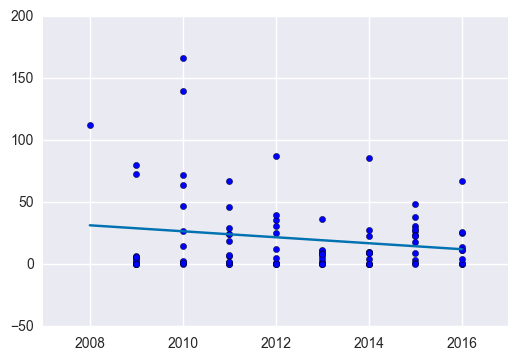

In [15]:
# plot scatter and polyfit line
plt.scatter(df.YEAR, df.PRCP)
plt.plot(df.YEAR, m*df.YEAR + b, '-');

#### Fit monthly precipitation data

In [16]:
# 1st order (line) with np.polyfit
m, b = np.polyfit(df.MONTH, df.PRCP, 1)

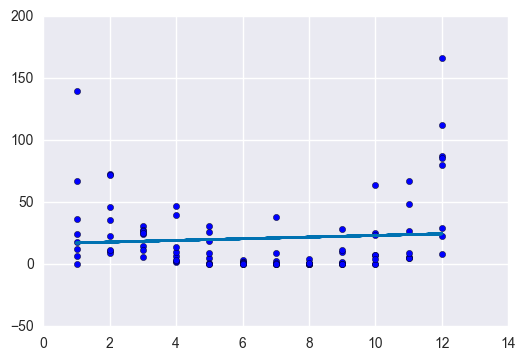

In [17]:
plt.scatter(df.MONTH, df.PRCP)
plt.plot(df.MONTH, m*df.MONTH + b, '-');

In [18]:
# 2nd order with np.polyfit
p = np.polyfit(df.MONTH, df.PRCP, 2)

In [19]:
# values of p are in decending orders
p

array([  1.68178223, -21.14169112,  67.38422486])

In [20]:
# create a more finely spaced x vector and then calculate the y vector for the fit curve 
x1 = np.linspace(1, 12)
y1 = np.polyval(p, x1)

In [21]:
x1

array([  1.        ,   1.2244898 ,   1.44897959,   1.67346939,
         1.89795918,   2.12244898,   2.34693878,   2.57142857,
         2.79591837,   3.02040816,   3.24489796,   3.46938776,
         3.69387755,   3.91836735,   4.14285714,   4.36734694,
         4.59183673,   4.81632653,   5.04081633,   5.26530612,
         5.48979592,   5.71428571,   5.93877551,   6.16326531,
         6.3877551 ,   6.6122449 ,   6.83673469,   7.06122449,
         7.28571429,   7.51020408,   7.73469388,   7.95918367,
         8.18367347,   8.40816327,   8.63265306,   8.85714286,
         9.08163265,   9.30612245,   9.53061224,   9.75510204,
         9.97959184,  10.20408163,  10.42857143,  10.65306122,
        10.87755102,  11.10204082,  11.32653061,  11.55102041,
        11.7755102 ,  12.        ])

In [22]:
y1

array([ 47.92431598,  44.01806249,  40.28131809,  36.71408276,
        33.31635652,  30.08813935,  27.02943126,  24.14023226,
        21.42054233,  18.87036149,  16.48968972,  14.27852703,
        12.23687342,  10.36472889,   8.66209345,   7.12896708,
         5.76534979,   4.57124158,   3.54664245,   2.6915524 ,
         2.00597143,   1.48989954,   1.14333673,   0.966283  ,
         0.95873835,   1.12070278,   1.45217628,   1.95315887,
         2.62365054,   3.46365129,   4.47316111,   5.65218002,
         7.00070801,   8.51874507,  10.20629122,  12.06334644,
        14.08991075,  16.28598413,  18.6515666 ,  21.18665814,
        23.89125877,  26.76536847,  29.80898725,  33.02211512,
        36.40475206,  39.95689808,  43.67855318,  47.56971737,
        51.63039063,  55.86057297])

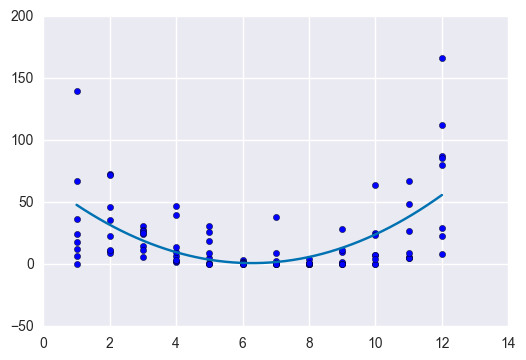

In [23]:
plt.scatter(df.MONTH, df.PRCP)
plt.plot(x1, y1, '-');

In [24]:
# 3rd order with np.polyfit
p = np.polyfit(df.MONTH, df.PRCP, 3)

In [25]:
x1 = np.linspace(1, 12)
y1 = np.polyval(p, x1)

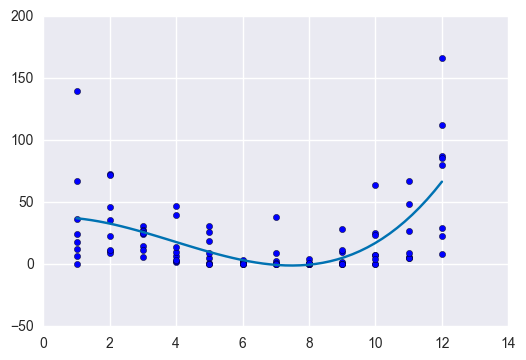

In [26]:
plt.scatter(df.MONTH, df.PRCP)
plt.plot(x1, y1, '-');

### Scipy

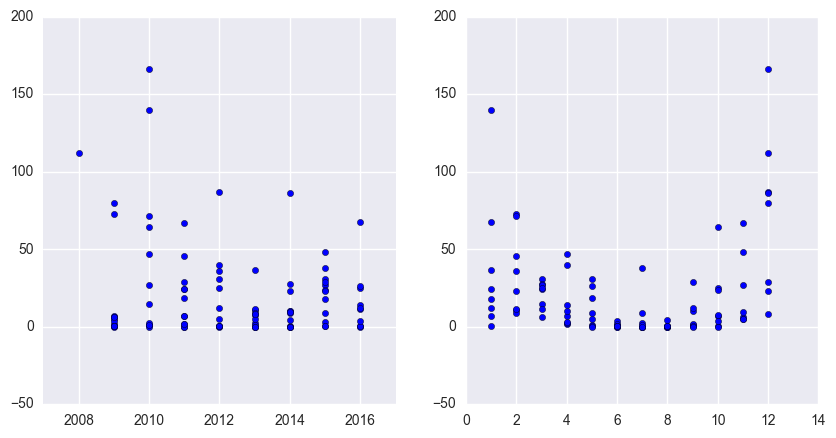

In [27]:
# plot precipitation by year and by month
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].scatter(df.YEAR, df.PRCP);
ax[1].scatter(df.MONTH, df.PRCP);

#### Pearson correlation

In [28]:
# pearson correlation (linear regression on values) by year
pearson_r_year, pearson_p_year = scipy.stats.pearsonr(df.YEAR, df.PRCP)
pearson_r_year, pearson_p_year

(-0.18039434020868891, 0.080226674190708003)

In [29]:
# pearson correlation (linear regression on values) by month
pearson_r_month, pearson_p_month = scipy.stats.pearsonr(df.MONTH, df.PRCP)
pearson_r_month, pearson_p_month

(0.074666303245149584, 0.47206231047791558)

#### Spearman correlation

In [30]:
# spearman correlation (linear regression on values) by year
spearman_r_year, spearman_p_year = scipy.stats.spearmanr(df.YEAR, df.PRCP)
spearman_r_year, spearman_p_year

(0.005679820699976767, 0.95643514497662185)

In [31]:
# spearman correlation (linear regression on values) by month
spearman_r_month, spearman_p_month = scipy.stats.spearmanr(df.MONTH, df.PRCP)
spearman_r_month, spearman_p_month

(-0.10072624672885, 0.33143170063286653)

#### Fit time series to sine wave

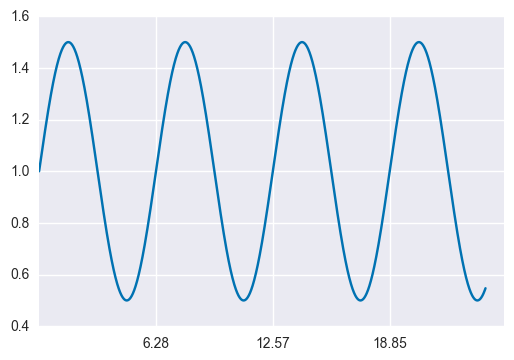

In [32]:
# sine wave refresher
period = 2*np.pi
freq = (2*np.pi)/period
phase = 0
amplitude = .5
offset = 1
x1 = np.linspace(0, 24, num=2000)
y1 = np.sin(x1 * freq + phase) * amplitude + offset
plt.plot(x1, y1)
plt.xticks([2*np.pi, 4*np.pi, 6*np.pi]);

In [33]:
# we are going to use the numerical index for our "t" variable
df.head()

,DATE,LATITUDE,LONGITUDE,ELEVATION,PRCP,MONTH,YEAR
0,2008-12-01,32.82540,-117.2397,154.80,112.40,12,2008
1,2009-01-01,32.82540,-117.2397,154.80,6.90,1,2009
2,2009-02-01,32.82540,-117.2397,154.80,72.60,2,2009
3,2009-03-01,32.82555,-117.2449,152.25,6.10,3,2009
4,2009-04-01,32.82555,-117.2449,152.25,2.05,4,2009


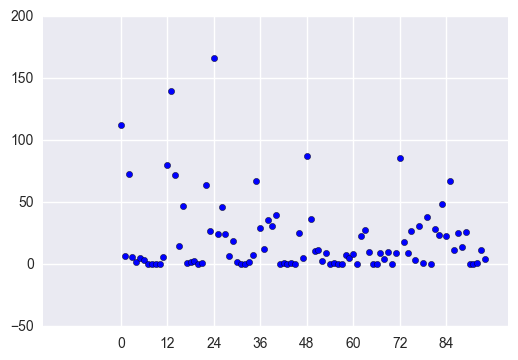

In [34]:
# make sure our index is sequential (December 2008 is zero)
plt.scatter(df.index, df.PRCP)
plt.xticks(np.arange(0, df.index.max(), 12));

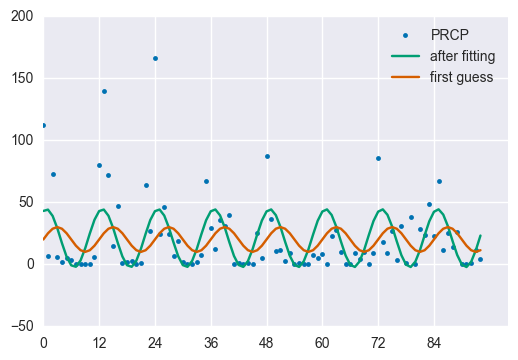

In [35]:
# store our values as new variables
t = df.index
data = df.PRCP

# guess the sine wave properties
guess_period = 12
guess_freq = (2*np.pi)/guess_period
guess_phase = 0
guess_amplitude = 10
guess_offset = 20

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# now do the fit
fit = scipy.optimize.curve_fit(my_sin, t, data, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *fit[0])

plt.plot(data, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.xticks(np.arange(0, df.index.max(), 12))
plt.legend();

#### Two-sample t-test

In [36]:
# create sample data
np.random.seed(1)
a = np.random.randn(40)
b = 1.5*np.random.randn(50)+2

# scipy.stats.ttest_ind (t-test for the means of two independent samples)
t, p = scipy.stats.ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

# compute the descriptive statistics of a and b
abar = a.mean()
avar = a.var(ddof=1)
na = a.size
adof = na - 1

bbar = b.mean()
bvar = b.var(ddof=1)
nb = b.size
bdof = nb - 1

# scipy.stats.ttest_ind_from_stats (t-test for the means of two independent samples from descriptive stats)
t2, p2 = scipy.stats.ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))

# use the formulas directly
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*scipy.special.stdtr(dof, -np.abs(tf))

ttest_ind:            t = -9.86068  p = 7.14488e-16
ttest_ind_from_stats: t = -9.86068  p = 7.14488e-16


/Users/luke.thompson/miniconda3/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


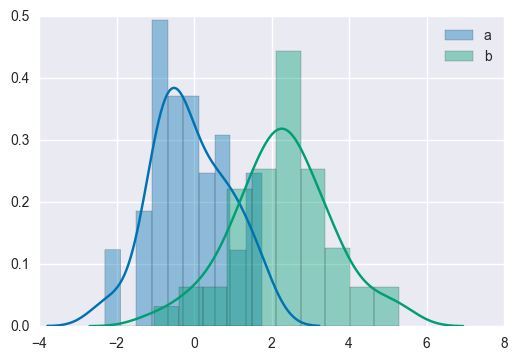

In [37]:
sns.distplot(a, bins=10, label='a')
sns.distplot(b, bins=10, label='b')
plt.legend();

### Scikit-bio

This last lesson is taken from the documentation for [Scikit-bio](http://scikit-bio.org/docs/latest/). The package `skbio.diversity` provides diversity measures for OTU tables.

In [38]:
from skbio.diversity import alpha_diversity
from skbio import TreeNode
from io import StringIO
from skbio.diversity import beta_diversity
from skbio.stats.distance import mantel
from skbio.stats.ordination import pcoa
from skbio.stats.distance import anosim

Create a matrix containing 6 samples (rows) and 7 OTUs (columns):

In [39]:
data = [[23, 64, 14, 0, 0, 3, 1],
        [0, 3, 35, 42, 0, 12, 1],
        [0, 5, 5, 0, 40, 40, 0],
        [44, 35, 9, 0, 1, 0, 0],
        [0, 2, 8, 0, 35, 45, 1],
        [0, 0, 25, 35, 0, 19, 0]]
ids = list('ABCDEF')

First, we’ll compute observed OTUs, an alpha diversity metric, for each sample using the alpha_diversity driver function:

In [40]:
adiv_obs_otus = alpha_diversity('observed_otus', data, ids)
adiv_obs_otus

A    5
B    5
C    4
D    4
E    5
F    3
dtype: int64

Next we’ll compute Faith’s PD on the same samples. Since this is a phylogenetic diversity metric, we’ll first create a tree and an ordered list of OTU identifiers.

In [41]:
tree = TreeNode.read(StringIO(
               '(((((OTU1:0.5,OTU2:0.5):0.5,OTU3:1.0):1.0):0.0,'
               '(OTU4:0.75,(OTU5:0.5,(OTU6:0.5,OTU7:0.5):0.5):'
               '0.5):1.25):0.0)root;'))
otu_ids = ['OTU1', 'OTU2', 'OTU3', 'OTU4', 'OTU5', 'OTU6', 'OTU7']
adiv_faith_pd = alpha_diversity('faith_pd', data, ids=ids, otu_ids=otu_ids, tree=tree)
adiv_faith_pd

A    6.75
B    7.00
C    6.25
D    5.75
E    6.75
F    5.50
dtype: float64

Now we’ll compute Bray-Curtis distances, a beta diversity metric, between all pairs of samples. Notice that the data and ids parameters provided to beta_diversity are the same as those provided to alpha_diversity.

In [42]:
bc_dm = beta_diversity("braycurtis", data, ids)
print(bc_dm)

6x6 distance matrix
IDs:
'A', 'B', 'C', 'D', 'E', 'F'
Data:
[[ 0.          0.78787879  0.86666667  0.30927835  0.85714286  0.81521739]
 [ 0.78787879  0.          0.78142077  0.86813187  0.75        0.1627907 ]
 [ 0.86666667  0.78142077  0.          0.87709497  0.09392265  0.71597633]
 [ 0.30927835  0.86813187  0.87709497  0.          0.87777778  0.89285714]
 [ 0.85714286  0.75        0.09392265  0.87777778  0.          0.68235294]
 [ 0.81521739  0.1627907   0.71597633  0.89285714  0.68235294  0.        ]]


Next, we’ll compute weighted UniFrac distances between all pairs of samples. Because weighted UniFrac is a phylogenetic beta diversity metric, we’ll need to pass the skbio.TreeNode and list of OTU ids that we created above. Again, these are the same values that were provided to alpha_diversity.

In [43]:
wu_dm = beta_diversity("weighted_unifrac", data, ids, tree=tree, otu_ids=otu_ids)
print(wu_dm)

6x6 distance matrix
IDs:
'A', 'B', 'C', 'D', 'E', 'F'
Data:
[[ 0.          2.77549923  3.82857143  0.42512039  3.8547619   3.10937312]
 [ 2.77549923  0.          2.26433692  2.98435423  2.24270353  0.46774194]
 [ 3.82857143  2.26433692  0.          3.95224719  0.16025641  1.86111111]
 [ 0.42512039  2.98435423  3.95224719  0.          3.98796148  3.30870431]
 [ 3.8547619   2.24270353  0.16025641  3.98796148  0.          1.82967033]
 [ 3.10937312  0.46774194  1.86111111  3.30870431  1.82967033  0.        ]]


Next we’ll do some work with these beta diversity distance matrices. First, we’ll determine if the UniFrac and Bray-Curtis distance matrices are significantly correlated by computing the Mantel correlation between them. Then we’ll determine if the p-value is significant based on an alpha of 0.05.

In [44]:
r, p_value, n = mantel(wu_dm, bc_dm)
print(r)
alpha = 0.05
print(p_value < alpha)

0.922404392093
True


Next, we’ll perform principal coordinates analysis (PCoA) on our weighted UniFrac distance matrix.

In [45]:
wu_pc = pcoa(wu_dm)

/Users/luke.thompson/miniconda3/envs/python3/lib/python3.5/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:111: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.011492611219229593 and the largest is 16.021722090908206.
  RuntimeWarning


PCoA plots are only really interesting in the context of sample metadata, so let’s define some before we visualize these results.

In [46]:
sample_md = [
    ('A', ['gut', 's1']),
    ('B', ['skin', 's1']),
    ('C', ['tongue', 's1']),
    ('D', ['gut', 's2']),
    ('E', ['tongue', 's2']),
    ('F', ['skin', 's2'])]
sample_md = pd.DataFrame.from_items( sample_md, columns=['body_site', 'subject'], orient='index')
sample_md

,body_site,subject
A,gut,s1
B,skin,s1
C,tongue,s1
D,gut,s2
E,tongue,s2
F,skin,s2


Now let’s plot our PCoA results, coloring each sample by the subject it was taken from:

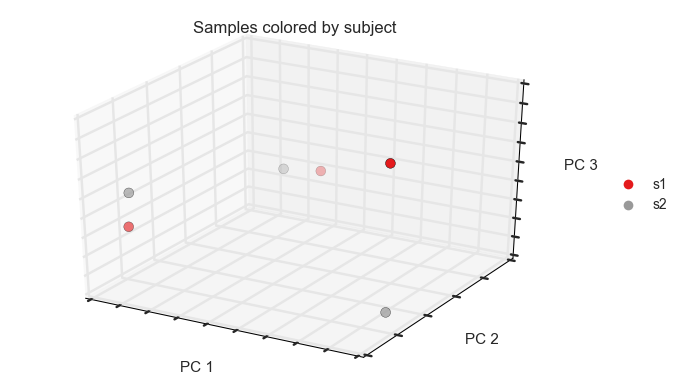

In [47]:
sns.set_style('white')
fig = wu_pc.plot(sample_md, 'subject',
    axis_labels=('PC 1', 'PC 2', 'PC 3'),
    title='Samples colored by subject', cmap='Set1', s=50)

We don’t see any clustering/grouping of samples. If we were to instead color the samples by the body site they were taken from, we see that the samples from the same body site (those that are colored the same) appear to be closer to one another in the 3-D space then they are to samples from other body sites.

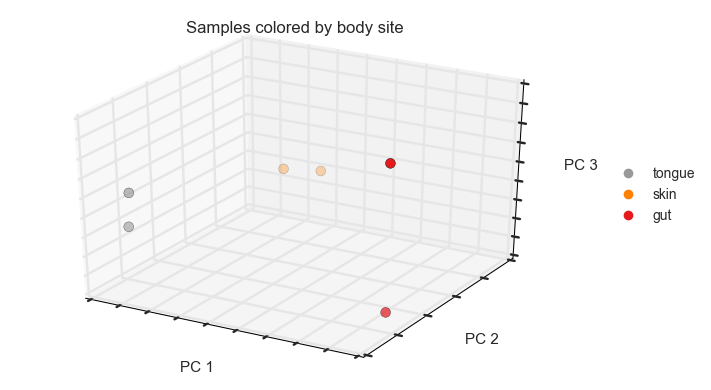

In [48]:
fig = wu_pc.plot(sample_md, 'body_site',
    axis_labels=('PC 1', 'PC 2', 'PC 3'),
    title='Samples colored by body site', cmap='Set1', s=50)

Ordination techniques, such as PCoA, are useful for exploratory analysis. The next step is to quantify the strength of the grouping/clustering that we see in ordination plots. There are many statistical methods available to accomplish this; many operate on distance matrices. Let’s use ANOSIM to quantify the strength of the clustering we see in the ordination plots above, using our weighted UniFrac distance matrix and sample metadata.

First test the grouping of samples by subject:

In [49]:
results = anosim(wu_dm, sample_md, column='subject', permutations=999)


In [50]:
results['test statistic']

-0.33333333333333331

In [51]:
results['p-value'] < 0.1

False

The negative value of ANOSIM’s R statistic indicates anti-clustering and the p-value is insignificant at an alpha of 0.1.

Now let’s test the grouping of samples by body site:

In [52]:
results = anosim(wu_dm, sample_md, column='body_site', permutations=999)

In [53]:
results['test statistic']

1.0

In [54]:
results['p-value'] < 0.1

True

The R statistic indicates strong separation of samples based on body site. The p-value is significant at an alpha of 0.1.

We can also explore the alpha diversity in the context of sample metadata. To do this, let’s add the Observed OTU and Faith PD data to our sample metadata. This is straight-forward beause alpha_diversity returns a Pandas Series object, and we’re representing our sample metadata in a Pandas DataFrame object.

In [55]:
sample_md['Observed OTUs'] = adiv_obs_otus
sample_md['Faith PD'] = adiv_faith_pd
sample_md

,body_site,subject,Observed OTUs,Faith PD
A,gut,s1,5,6.75
B,skin,s1,5,7.00
C,tongue,s1,4,6.25
D,gut,s2,4,5.75
E,tongue,s2,5,6.75
F,skin,s2,3,5.50


We can investigate these alpha diversity data in the context of our metadata categories. For example, we can generate boxplots showing Faith PD by body site.

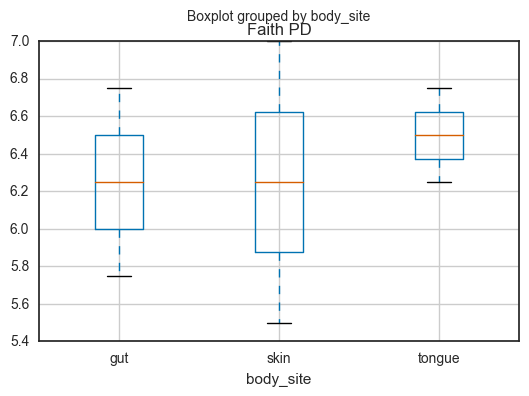

In [56]:
fig = sample_md.boxplot(column='Faith PD', by='body_site')

We can also compute Spearman correlations between all pairs of columns in this DataFrame. Since our alpha diversity metrics are the only two numeric columns (and thus the only columns for which Spearman correlation is relevant), this will give us a symmetric 2x2 correlation matrix.

In [57]:
sample_md.corr(method="spearman")

,Observed OTUs,Faith PD
Observed OTUs,1.000000,0.939336
Faith PD,0.939336,1.000000
